In [205]:
import pandas as pd

In [206]:
csv_url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(csv_url, header=None)
csv_custom_headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compress-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = csv_custom_headers
df.head()
df = df[~df.price.str.contains("?", regex=False)] # or escape ? with /
df.dropna(subset=["price"], axis=0, inplace=True)
df["price"] = df["price"].astype("int")


In [207]:
# is there any relationship between the different types of drive system, forward, rear, and four-wheel drive, and the price of the vehicles? It would be nice if we could group all the data by the different types of drive wheels and compare the results of these different drive wheels against each other.

In [208]:
# let's say we are interested in finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables

In [209]:
df_test = df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

In [210]:
# we can transform the above table to pivot table

In [211]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [212]:
# Heatmap : Plot target variable over multiple variables

In [213]:
import matplotlib.pyplot as plt

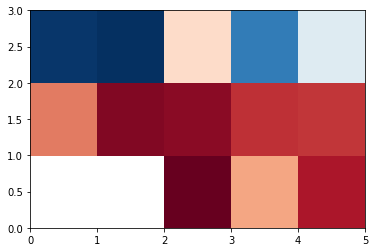

In [214]:
plt.pcolor(df_pivot, cmap='RdBu')

In [215]:
# pending: https://www.coursera.org/learn/data-analysis-with-python/lecture/eAka9/groupby-in-python

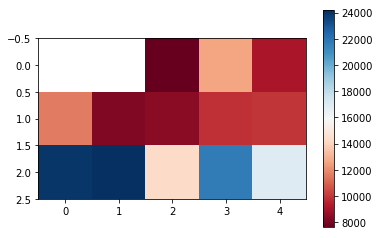

In [216]:
fig, ax = plt.subplots()
img1 = ax.imshow(df_pivot,cmap='RdBu')
plt.colorbar(img1, ax=ax)